In [ ]:
# Loading, Cleaning and Preprocessing the Breast Cancer dataset from sklearn.datasets used in this project

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the dataset
# The dataset is loaded using load_breast_cancer() from sklearn.datasets
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:\n")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows in the dataset:", df.duplicated().sum())

# Handle missing values and duplicates if any
df.drop_duplicates(inplace=True)

# Normalize the data
# Using StandardScaler to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

# Display normalized data
print("\nNormalized Data (first 5 rows):\n")
print(X_scaled[:5])


In [ ]:
# PCA Implementation

# Principal Component Analysis (PCA) will help us identify the most important variables for analysis. 
# Performing PCA to reduce the dimensions of the dataset and extract meaningful components.

from sklearn.decomposition import PCA

# Apply PCA
# We apply PCA to the normalized data with 30 components.
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio

# Explained Variance: We calculate the explained variance ratio for each component to understand how much variance each component captures.
# Cumulative Variance: This helps us decide the number of components to retain based on the desired level of explained variance.

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio for each component:\n")
print(explained_variance)
print("\nCumulative Explained Variance:\n")
print(cumulative_variance)


In [ ]:
# Dimensionality Reduction
# Reducing the dataset to 2 principal components for visualization and analysis

# Reduce to 2 components
# Reducing Components: The dataset is reduced to two components that capture most of the variance.
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Explained variance for 2 components
# Variance of 2 Components: We observe the explained variance ratio for these two components to verify they capture significant information.
explained_variance_2 = pca_2.explained_variance_ratio_
print("\nExplained Variance Ratio for 2 components:\n")
print(explained_variance_2)


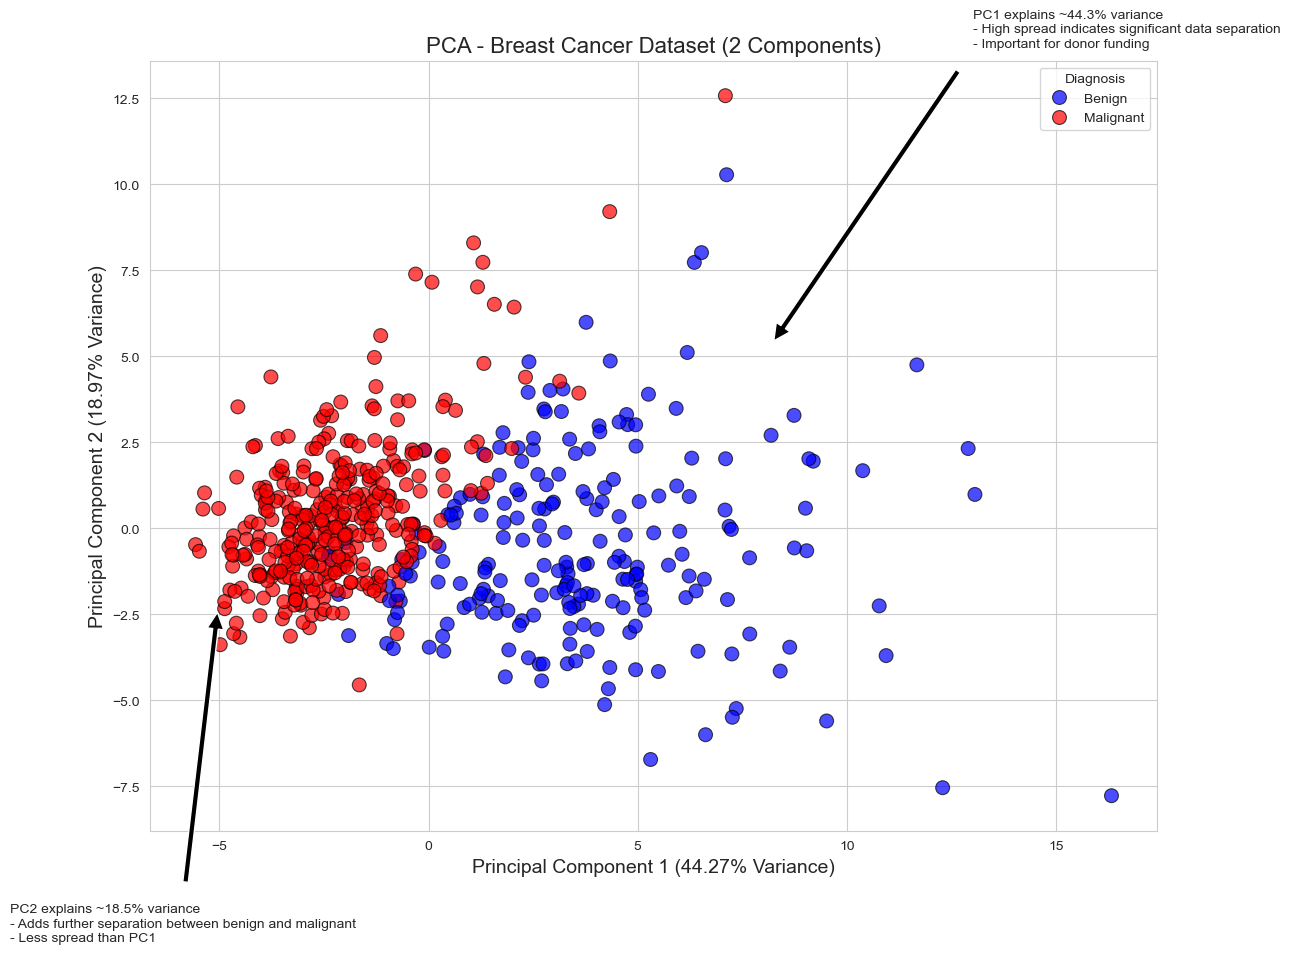

In [96]:
# Visualizing PCA Components
# Plotting the 2 PCA components to visualize the dataset and identify essential variables for securing donor funding.

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(13, 10))
sns.set_style('whitegrid')

# Create a scatter plot with seaborn
scatter = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='target', 
    data=df_pca,
    palette={0: 'blue', 1: 'red'}, # Blue for Benign, Red for Malignant
    edgecolor='k', 
    alpha=0.7,
    s=100
)

# Add plot title and axis labels
plt.title('PCA - Breast Cancer Dataset (2 Components)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_2[0]*100:.2f}% Variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance_2[1]*100:.2f}% Variance)', fontsize=14)

# Custom legend
legend_labels = {0: 'Benign', 1: 'Malignant'}
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles, labels=[legend_labels[int(label)] for label in labels], title='Diagnosis', loc='upper right')

# Annotations to explain variance
plt.annotate(
    'PC1 explains ~44.3% variance\n- High spread indicates significant data separation\n- Important for donor funding',
    xy=(8, 5), xytext=(13, 14),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10, bbox=dict(facecolor='white', alpha=0.8)
)

plt.annotate(
    'PC2 explains ~18.5% variance\n- Adds further separation between benign and malignant\n- Less spread than PC1',
    xy=(-5, -2), xytext=(-10, -12),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10, bbox=dict(facecolor='white', alpha=0.8)
)

# Save plot and show
plt.savefig('pca_components.png')
plt.show()

# See README for further details on Key Insights and Visualization Analysis

In [ ]:
# Logistic Regression 
# Implementing logistic regression to predict cancer classes based on the reduced dataset.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, df['target'], test_size=0.2, random_state=42)

# Logistic Regression Model 
# We train a logistic regression model on the 2-component PCA data.
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_model.predict(X_test)

# Evaluation
# The model's performance is evaluated using accuracy, confusion matrix, and classification report.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nLogistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
